<a href="https://colab.research.google.com/github/DristantaNirola/Nifty50_Index_Movement_Prediction/blob/main/Capstone_project_nifty_Stock_direction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Nifty?
 
#### National Stock Exchange Fifty or Nifty is the market indicator of NSE. It ideally is a collection of 50 stocks but presently has 51 listed in it. It is also referred to as Nifty 50 and CNX Nifty by some as it is owned and managed by India Index Services and Products Ltd. (IISL).
 


##  Objective :
* ### To perform time series analysis on the NIFTY stock price and forecusting using univariate ARIMA and ARIMAX modeling technique. 
* ### The problem is further simplified to just predict the direction of nifty index movements in the next N days (throughout our experiments N can take values 1, 5, and 30). Initially, we will take N=1, that means we want to predict the NIFTY 50 index movement in the next day. This is represented as a classification task where there are two possible outcomes (either the index went up in the next day or it went down).

### Importing required libraries

In [1]:
# Libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Datetime library for date and time functions
from datetime import datetime

### Loading the Data 

In [2]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
nifty_data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 5/Week 1/Day 1/Nifty50_data.csv')

# shape of the dataset 
nifty_data.shape

(5301, 5)

### Basic pre processing on our raw data

In [4]:
# Top 5 values
nifty_data.head()

,Date,Open,High,Low,Close
0,2000-01-03,1482.15,1592.90,1482.15,1592.2
1,2000-01-04,1594.40,1641.95,1594.40,1638.7
2,2000-01-05,1634.55,1635.50,1555.05,1595.8
3,2000-01-06,1595.80,1639.00,1595.80,1617.6
4,2000-01-07,1616.60,1628.25,1597.20,1613.3


In [5]:
# Bottom 5 values
nifty_data.tail()

,Date,Open,High,Low,Close
5296,2021-05-04,14687.250000,14723.400391,14461.500000,14496.500000
5297,2021-05-05,14604.150391,14637.900391,14506.599609,14617.849609
5298,2021-05-06,14668.349609,14743.900391,14611.500000,14724.799805
5299,2021-05-07,14816.849609,14863.049805,14765.500000,14823.150391
5300,2021-05-10,14928.250000,14966.900391,14892.500000,14942.349609


In [6]:
# setting dates as the index to the the dataframe
nifty_df = nifty_data.set_index('Date')

In [7]:
nifty_df.head()

,Open,High,Low,Close
Date,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2
2000-01-04,1594.40,1641.95,1594.40,1638.7
2000-01-05,1634.55,1635.50,1555.05,1595.8
2000-01-06,1595.80,1639.00,1595.80,1617.6
2000-01-07,1616.60,1628.25,1597.20,1613.3


In [8]:
# Finding the total null values
nifty_df.isna().sum()

Open     35
High     35
Low      35
Close    35
dtype: int64

In [9]:
nifty_df[nifty_df.isnull().any(axis=1)][:10]

,Open,High,Low,Close
Date,,,,
2008-11-27,NaN,NaN,NaN,NaN
2009-04-30,NaN,NaN,NaN,NaN
2009-10-13,NaN,NaN,NaN,NaN
2009-12-23,NaN,NaN,NaN,NaN
2009-12-24,NaN,NaN,NaN,NaN
2009-12-29,NaN,NaN,NaN,NaN
2009-12-30,NaN,NaN,NaN,NaN
2009-12-31,NaN,NaN,NaN,NaN
2010-02-06,NaN,NaN,NaN,NaN


In [10]:
# Droping the null values 
nifty_df.dropna(inplace=True)

In [11]:
nifty_df.shape

(5266, 4)

#### Conclusion:
* The data has 5336 rows and 5 columns.
* Their are 35 null values in the dataframe which includes the date when the trading didn't happen.
* The null values are droped from the dataset for further analysis.


## 1. Exploratory Data Analysis:

In [12]:
# finding the high level statistics for the continious features
nifty_df.describe()

,Open,High,Low,Close
count,5266.000000,5266.000000,5266.000000,5266.000000
mean,5551.787316,5588.846043,5506.832156,5548.545092
std,3582.719644,3594.485464,3561.245855,3578.111274
min,853.000000,877.000000,849.950000,854.200000
25%,2057.987500,2074.525000,2045.950000,2058.750000
50%,5213.675049,5252.199951,5163.449951,5211.025000
75%,8261.987305,8308.112793,8216.375244,8262.199707
max,15371.450195,15431.750000,15243.400391,15314.700195


### 1.1. Line plot

<Figure size 1080x504 with 0 Axes>

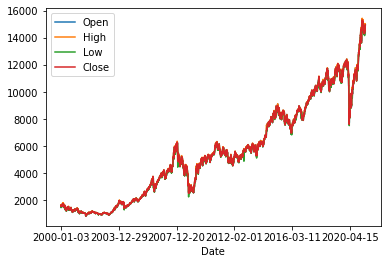

In [13]:
# Ploting a multiline line plot
plt.figure(figsize=(15, 7)) 
lines= nifty_df[:].plot.line()

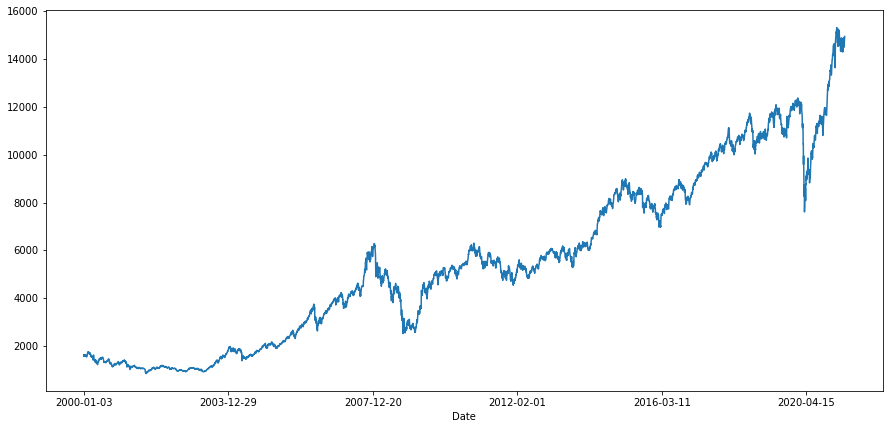

In [14]:
# Closing price trend
plt.figure(figsize=(15, 7))
line= nifty_df['Close'].plot.line()

In [15]:
# Finding the rise in 2008
nifty_df[nifty_df['Close']== max(nifty_df['Close'].loc['2007-01-01':'2009-01-01'])]

,Open,High,Low,Close
Date,,,,
2008-01-08,6282.450195,6357.100098,6221.600098,6287.850098


The 50-share Nifty opened at 6,282 levels, surpassing its previous intra-day high on January 8, 2008, after the outcome of the Assembly polls in Delhi, Rajasthan, Madhya Pradesh and Chattisgarh, that saw the Bharatiya Janata Party (BJP) emerge as the single largest party. The index finally ended at its record closing high of 6,287.

In [16]:
# Finding the fall in 2008
nifty_df[nifty_df['Close']== min(nifty_df['Close'].loc['2007-01-01':'2009-01-01'])]

,Open,High,Low,Close
Date,,,,
2008-10-27,2583.75,2585.300049,2252.75,2524.199951


The 50 share Nifty open at 2583 and closed at 2524 on 2008-10-27 which was the outcome of the Global financial crisis.

In [17]:
# Date of min closing price in 20 years
nifty_df[nifty_df['Close']== nifty_df['Close'].min()]

,Open,High,Low,Close
Date,,,,
2001-09-21,903.75,903.75,849.95,854.2


On 2001-09-21 the nifty50 was at it's low

In [18]:
# Date of maximum closing price in 20 years
nifty_df[nifty_df['Close']== nifty_df['Close'].max()]

,Open,High,Low,Close
Date,,,,
2021-02-15,15270.299805,15340.150391,15243.400391,15314.700195


on 2021-02-15 the nifty was at it's all time high. This was outcome of more Investments coming in India as an alternative to china due to the global pendamic.

In [19]:
#index jump
index_jump= np.array(nifty_df['Close'].iloc[1:]) - np.array(nifty_df['Close'].iloc[:-1])

In [20]:
#date of maximum price jump
nifty_df.iloc[np.argmax(index_jump),:]

Open     8356.549805
High     8356.549805
Low      8055.799805
Close    8083.799805
Name: 2020-04-03, dtype: float64

on 2020-04-03 there was higest rise in the index 

In [21]:
#index fall
index_fall= np.array(nifty_df['Close'].iloc[:-1]) - np.array(nifty_df['Close'].iloc[1:])

In [22]:
#date of maximum index fall
nifty_df.iloc[np.argmax(index_fall),:]

Open     8284.450195
High     8883.000000
Low      8178.200195
Close    8745.450195
Name: 2020-03-20, dtype: float64

On 2020-03-20 there was maximum fall in the nifty index which was the outcome of country wide lockdown.

### 1.2 Decomposition of Time Series

#### Additive Model:  
This model is used when the variations around the trend does not vary with the level of the time series. Here the components of a time series are simply added together using the formula:  
y(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t)


In [23]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


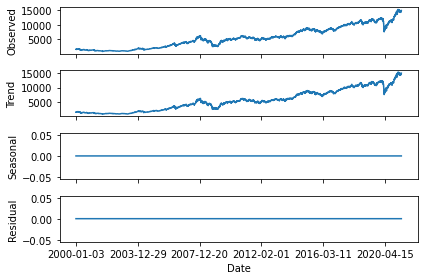

In [25]:
df= pd.DataFrame(nifty_df['Close'])
s=seasonal_decompose(df, model= 'additive', freq= 1)
fig = s.plot()

# Objective 1: 
To perform time series analysis on the NIFTY stock price and forecusting using univarate ARIMA and ARIMAX modeling technique.

### Using ARIMA for forcusting

In [ ]:
!pip install pmdarima

In [22]:
from pmdarima import auto_arima

In [23]:
df= nifty_data.copy()
df.dropna(inplace=True)

In [24]:
df.set_index("Date", drop=True, inplace=True)

In [25]:
df_train = df[df.index < "2019"]
df_valid = df[df.index >= "2019"]

In [ ]:
model = auto_arima(df_train.Close, trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.Close)

forecast = model.predict(n_periods=len(df_valid))
df_valid["Forecast_ARIMA"] = forecast

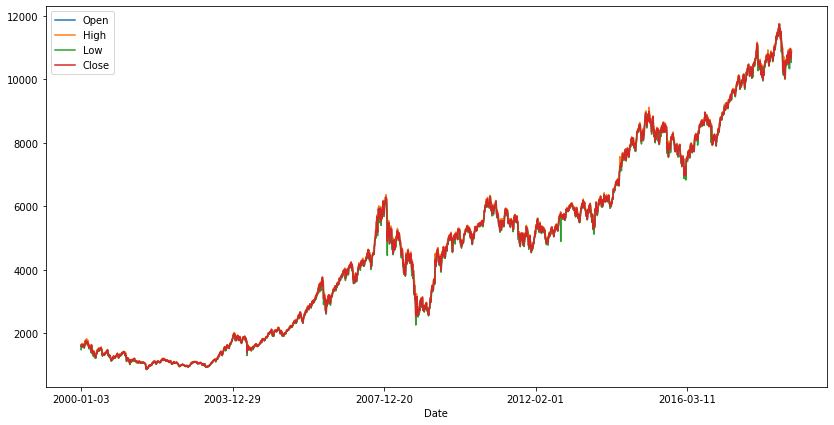

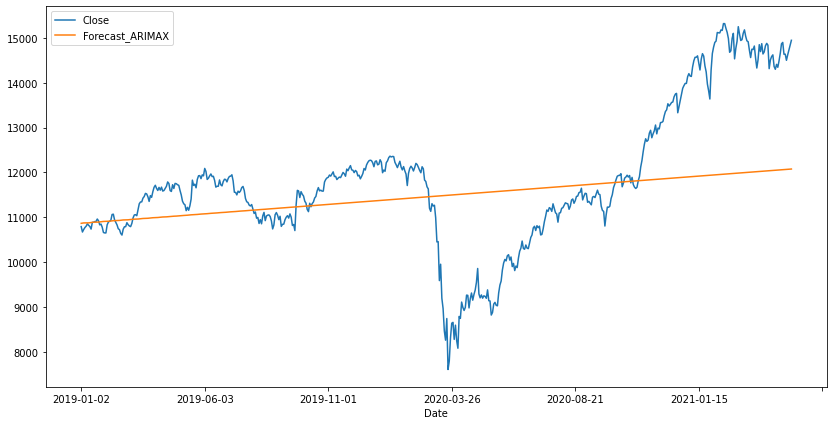

In [28]:
df_train.plot(figsize=(14, 7))
df_valid[["Close", "Forecast_ARIMA"]].plot(figsize=(14, 7))

In [ ]:
# Plot forcasting Close price
forecast_df = pd.DataFrame(forecast,index = df_valid.index,columns=['Prediction'])
plt.plot(df_train['Close'],label='Close Training Data')
plt.plot(df_valid['Close'],label='Close Test Data')
plt.plot(forecast_df['Prediction'],label='Close Forecasting Data')
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("RMSE of Auto ARIMA:", np.sqrt(mean_squared_error(df_valid.Close, df_valid.Forecast_ARIMAX)))
print("\nMAE of Auto ARIMA:", mean_absolute_error(df_valid.Close, df_valid.Forecast_ARIMAX))

# Using ARIMAX for forcasting:

In [37]:
nifty_data.head()

,Date,Open,High,Low,Close
0,2000-01-03,1482.15,1592.90,1482.15,1592.2
1,2000-01-04,1594.40,1641.95,1594.40,1638.7
2,2000-01-05,1634.55,1635.50,1555.05,1595.8
3,2000-01-06,1595.80,1639.00,1595.80,1617.6
4,2000-01-07,1616.60,1628.25,1597.20,1613.3


In [40]:
df= nifty_data.copy()
df.dropna(inplace=True)

In [41]:
df.reset_index(drop=True, inplace=True)
lag_features = ["Open","High", "Low", "Close"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)
df.set_index("Date", drop=True, inplace=True)
df.head()

,Open,High,Low,Close,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,Open_std_lag3,Open_std_lag7,Open_std_lag30,High_mean_lag3,High_mean_lag7,High_mean_lag30,High_std_lag3,High_std_lag7,High_std_lag30,Low_mean_lag3,Low_mean_lag7,Low_mean_lag30,Low_std_lag3,Low_std_lag7,Low_std_lag30,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,5547.483398,5542.514160,5514.119141,45.522327,68.892075,141.049759,5584.558594,5579.578125,5551.036133,38.862560,62.409687,135.257034,5502.552246,5497.606445,5469.410156,43.983521,69.701912,144.373383,5544.258789,5539.302246,5510.930664,44.819336,68.637215,140.728851
2000-01-04,1594.40,1641.95,1594.40,1638.7,1482.150024,1482.150024,1482.150024,45.522327,68.892075,141.049759,1592.900024,1592.900024,1592.900024,38.862560,62.409687,135.257034,1482.150024,1482.150024,1482.150024,43.983521,69.701912,144.373383,1592.199951,1592.199951,1592.199951,44.819336,68.637215,140.728851
2000-01-05,1634.55,1635.50,1555.05,1595.8,1538.275024,1538.275024,1538.275024,79.372734,79.372734,79.372734,1617.425049,1617.425049,1617.425049,34.683586,34.683586,34.683586,1538.275024,1538.275024,1538.275024,79.372734,79.372734,79.372734,1615.449951,1615.449951,1615.449951,32.880466,32.880466,32.880466
2000-01-06,1595.80,1639.00,1595.80,1617.6,1570.366699,1570.366699,1570.366699,78.991394,78.991394,78.991394,1623.449951,1623.449951,1623.449951,26.652908,26.652908,26.652908,1543.866699,1543.866699,1543.866699,56.954506,56.954506,56.954506,1608.900024,1608.900024,1608.900024,25.870253,25.870253,25.870253
2000-01-07,1616.60,1628.25,1597.20,1613.3,1608.250000,1576.724976,1576.724976,22.787222,65.737923,65.737923,1638.816650,1627.337524,1627.337524,3.228906,23.109211,23.109211,1581.750000,1556.849976,1556.849976,23.133471,53.261726,53.261726,1617.366699,1611.074951,1611.074951,21.450953,21.566235,21.566235


In [42]:
df_train = df[df.index < "2019"]
df_valid = df[df.index >= "2019"]

In [43]:
exogenous_features= ['Open_mean_lag3', 'Open_mean_lag7',
       'Open_mean_lag30', 'Open_std_lag3', 'Open_std_lag7', 'Open_std_lag30',
       'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30', 'High_std_lag3',
       'High_std_lag7', 'High_std_lag30', 'Low_mean_lag3', 'Low_mean_lag7',
       'Low_mean_lag30', 'Low_std_lag3', 'Low_std_lag7', 'Low_std_lag30',
       'Close_mean_lag3', 'Close_mean_lag7', 'Close_mean_lag30',
       'Close_std_lag3', 'Close_std_lag7', 'Close_std_lag30']

In [44]:
model = auto_arima(df_train.Close, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.Close, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55849.574, Time=46.75 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=55645.695, Time=6.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55587.972, Time=26.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=56024.239, Time=37.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57996.930, Time=35.88 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=55781.521, Time=39.47 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=55615.998, Time=46.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=56163.215, Time=36.32 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=55685.094, Time=26.89 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 301.147 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


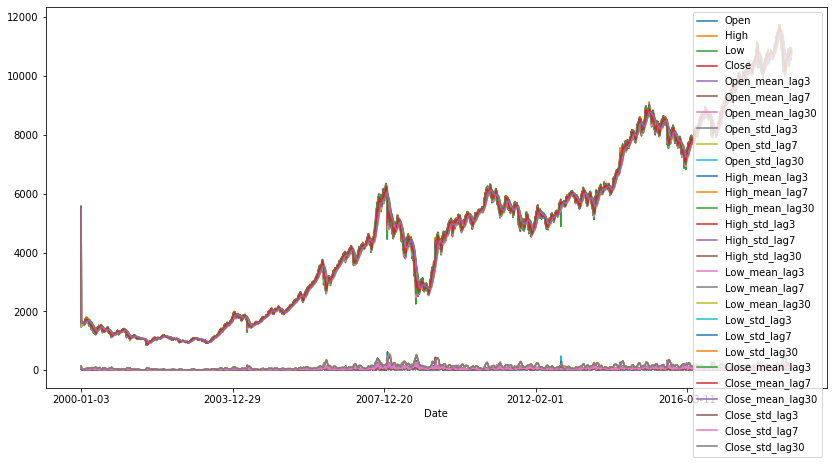

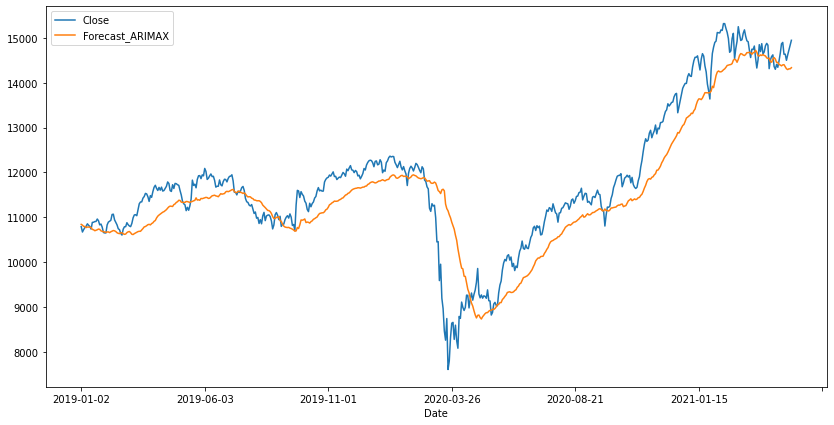

In [45]:
df_train.plot(figsize=(14, 7))
df_valid[["Close", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [75]:
df_valid['Close']

Date
2019-01-02    10792.500000
2019-01-03    10672.250000
2019-01-04    10727.349609
2019-01-07    10771.799805
2019-01-08    10802.150391
                  ...     
2021-05-04    14496.500000
2021-05-05    14617.849609
2021-05-06    14724.799805
2021-05-07    14823.150391
2021-05-10    14942.349609
Name: Close, Length: 576, dtype: float64

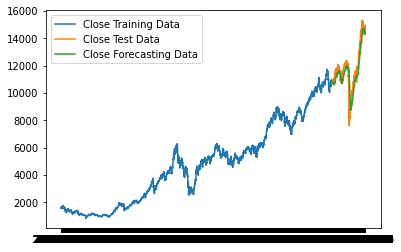

In [78]:
# Plot forcasting Close price
forecast_df = pd.DataFrame(forecast,index = df_valid.index,columns=['Prediction'])
plt.plot(df_train['Close'],label='Close Training Data')
plt.plot(df_valid['Close'],label='Close Test Data')
plt.plot(forecast_df['Prediction'],label='Close Forecasting Data')
plt.legend()

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.Close, df_valid.Forecast_ARIMAX)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.Close, df_valid.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 666.2609346258823

MAE of Auto ARIMAX: 496.2560709657612


## Objective 2: 
The problem is further simplified to just predict the direction of nifty index movements in the next N days (throughout our experiments N can take values 1, 5, and 30). Initially, we will take N=1, that means we want to predict the NIFTY 50 index movement in the next day. This is represented as a classification task where there are two possible outcomes (either the index went up in the next day or it went down).

### Creating the dependent variable which we want to predict

In [48]:
df= nifty_df.copy()

In [49]:
# Create the dependent variable..we want to predict the directionality of index movement in nexrt 5 minutes
df.loc[(df['Close']-df['Close'].shift(-1)) < 0,'target']=1
df.loc[(df['Close']-df['Close'].shift(-1)) >= 0,'target']=0

### Obtaining the class distribution of both classes of our dependent variable

In [50]:
df.target.value_counts()

1.0    2834
0.0    2431
Name: target, dtype: int64

In [51]:
df.shape

(5266, 5)

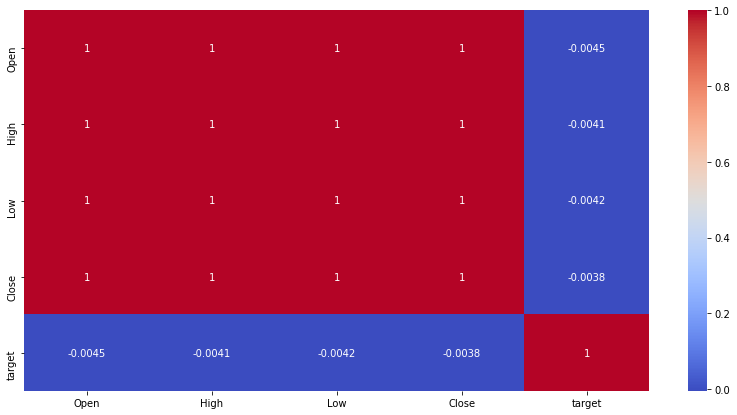

In [55]:
 ## Correlation heat map
import seaborn as sns
plt.figure(figsize=(14,7))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

## Feature Engineering

In [56]:
# Creating features with lags
def create_lag_vars(df,lags,col):   
  var_name = col+'_lag_' + str(lags)
  df[var_name] = df[col].shift(lags)

In [57]:
cols= ['High','Low','Open','Close']
lags = [1,5,6,7,8,10,12]
for col in cols:
   for lag in lags:
     create_lag_vars(df,lag,col)



In [58]:
df.head(10)

,Open,High,Low,Close,target,High_lag_1,High_lag_5,High_lag_6,High_lag_7,High_lag_8,High_lag_10,High_lag_12,Low_lag_1,Low_lag_5,Low_lag_6,Low_lag_7,Low_lag_8,Low_lag_10,Low_lag_12,Open_lag_1,Open_lag_5,Open_lag_6,Open_lag_7,Open_lag_8,Open_lag_10,Open_lag_12,Close_lag_1,Close_lag_5,Close_lag_6,Close_lag_7,Close_lag_8,Close_lag_10,Close_lag_12
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.20,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,1594.40,1641.95,1594.40,1638.70,0.0,1592.90,NaN,NaN,NaN,NaN,NaN,NaN,1482.15,NaN,NaN,NaN,NaN,NaN,NaN,1482.15,NaN,NaN,NaN,NaN,NaN,NaN,1592.20,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,1634.55,1635.50,1555.05,1595.80,1.0,1641.95,NaN,NaN,NaN,NaN,NaN,NaN,1594.40,NaN,NaN,NaN,NaN,NaN,NaN,1594.40,NaN,NaN,NaN,NaN,NaN,NaN,1638.70,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,1595.80,1639.00,1595.80,1617.60,0.0,1635.50,NaN,NaN,NaN,NaN,NaN,NaN,1555.05,NaN,NaN,NaN,NaN,NaN,NaN,1634.55,NaN,NaN,NaN,NaN,NaN,NaN,1595.80,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,1616.60,1628.25,1597.20,1613.30,1.0,1639.00,NaN,NaN,NaN,NaN,NaN,NaN,1595.80,NaN,NaN,NaN,NaN,NaN,NaN,1595.80,NaN,NaN,NaN,NaN,NaN,NaN,1617.60,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,1615.65,1662.10,1614.95,1632.95,0.0,1628.25,1592.90,NaN,NaN,NaN,NaN,NaN,1597.20,1482.15,NaN,NaN,NaN,NaN,NaN,1616.60,1482.15,NaN,NaN,NaN,NaN,NaN,1613.30,1592.2,NaN,NaN,NaN,NaN,NaN
2000-01-11,1633.25,1639.90,1548.25,1572.50,1.0,1662.10,1641.95,1592.90,NaN,NaN,NaN,NaN,1614.95,1594.40,1482.15,NaN,NaN,NaN,NaN,1615.65,1594.40,1482.15,NaN,NaN,NaN,NaN,1632.95,1638.7,1592.2,NaN,NaN,NaN,NaN
2000-01-12,1572.30,1631.55,1571.70,1624.80,0.0,1639.90,1635.50,1641.95,1592.90,NaN,NaN,NaN,1548.25,1555.05,1594.40,1482.15,NaN,NaN,NaN,1633.25,1634.55,1594.40,1482.15,NaN,NaN,NaN,1572.50,1595.8,1638.7,1592.2,NaN,NaN,NaN
2000-01-13,1627.85,1671.15,1613.65,1621.40,1.0,1631.55,1639.00,1635.50,1641.95,1592.90,NaN,NaN,1571.70,1595.80,1555.05,1594.40,1482.15,NaN,NaN,1572.30,1595.80,1634.55,1594.40,1482.15,NaN,NaN,1624.80,1617.6,1595.8,1638.7,1592.2,NaN,NaN


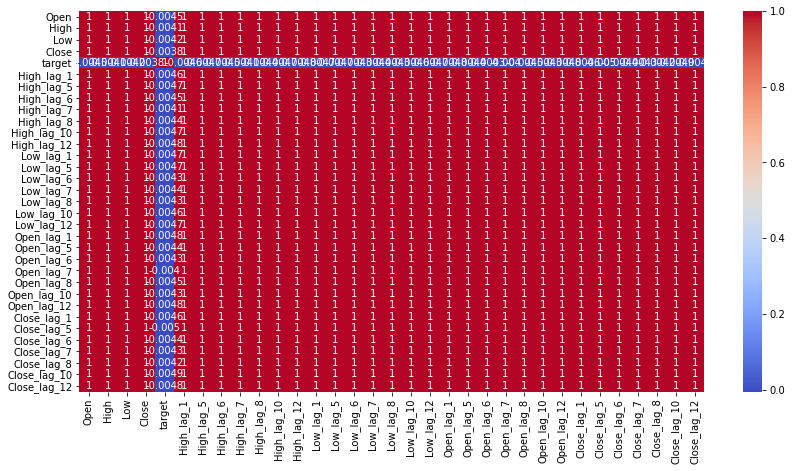

In [72]:
plt.figure(figsize=(14,7))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

<BarContainer object of 33 artists>

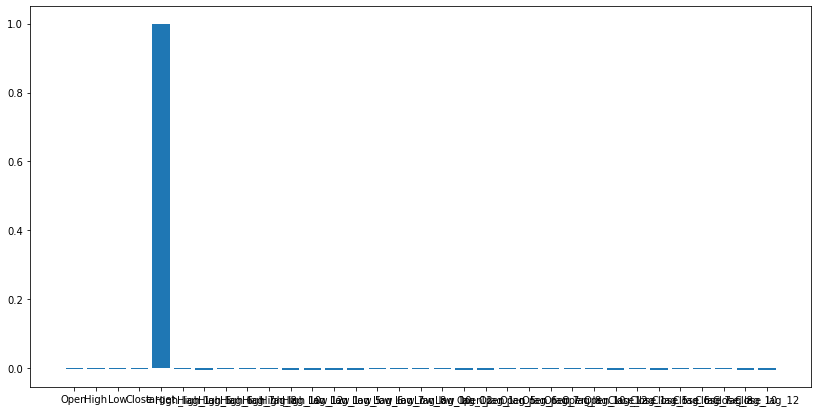

In [70]:
plt.figure(figsize=(14,7))
plt.bar(correlation.index,correlation.values) 

### Drop observations which have any NULL value

In [ ]:
df.shape

(5266, 33)

In [ ]:
df_target = df.target

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(5253, 33)

In [ ]:
5266 - 5253

13

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(5253, 33)

### Splitting data into train, validation and test

In [ ]:
def temporal_splitting(data,date1,date2,date3):
    train=data.loc[(data.index >= date1) & (data.index < date2)]
    val=data.loc[(data.index >= date2) & (data.index < date3),:]
    test=data.loc[data.index >= date3]
    
    return train, val, test

In [ ]:
train, val,test=temporal_splitting(df,'2014-01-01','2019-01-01','2020-01-01')

### Obtaining the distribution of the three datasets : Train, Validation and Test

In [ ]:
train.shape,val.shape,test.shape

((1221, 33), (241, 33), (334, 33))

### Dropping variables which we don't want to be part of model variables

In [ ]:
def my_var_columns(data,cols_to_remove):
    vars__ = list(data.columns[~data.columns.isin(cols_to_remove)])
    return vars__

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'target', 'High_lag_5', 'High_lag_6',
       'High_lag_7', 'High_lag_8', 'High_lag_10', 'High_lag_12', 'Low_lag_5',
       'Low_lag_6', 'Low_lag_7', 'Low_lag_8', 'Low_lag_10', 'Low_lag_12',
       'Open_lag_5', 'Open_lag_6', 'Open_lag_7', 'Open_lag_8', 'Open_lag_10',
       'Open_lag_12', 'Close_lag_5', 'Close_lag_6', 'Close_lag_7',
       'Close_lag_8', 'Close_lag_10', 'Close_lag_12', 'High_lag_1',
       'Low_lag_1', 'Open_lag_1', 'Close_lag_1'],
      dtype='object')

In [ ]:
DV='target'

# Drop columns which are not required
cols_to_remove=[DV,'Open', 'High', 'Low', 'Close', 'target']

In [ ]:
train_cols = my_var_columns(df,cols_to_remove)

### Final set of training variables

In [ ]:
train_cols

['High_lag_5',
 'High_lag_6',
 'High_lag_7',
 'High_lag_8',
 'High_lag_10',
 'High_lag_12',
 'Low_lag_5',
 'Low_lag_6',
 'Low_lag_7',
 'Low_lag_8',
 'Low_lag_10',
 'Low_lag_12',
 'Open_lag_5',
 'Open_lag_6',
 'Open_lag_7',
 'Open_lag_8',
 'Open_lag_10',
 'Open_lag_12',
 'Close_lag_5',
 'Close_lag_6',
 'Close_lag_7',
 'Close_lag_8',
 'Close_lag_10',
 'Close_lag_12',
 'High_lag_1',
 'Low_lag_1',
 'Open_lag_1',
 'Close_lag_1']

### Defining our training data consisting of independent variables and the dependent variable

In [ ]:
X_train=train[train_cols]
X_val=val[train_cols]
X_test=test[train_cols]

Y_train=train[DV]
Y_val=val[DV]
Y_test=test[DV]

In [ ]:
X_train.tail()

,High_lag_5,High_lag_6,High_lag_7,High_lag_8,High_lag_10,High_lag_12,Low_lag_5,Low_lag_6,Low_lag_7,Low_lag_8,Low_lag_10,Low_lag_12,Open_lag_5,Open_lag_6,Open_lag_7,Open_lag_8,Open_lag_10,Open_lag_12,Close_lag_5,Close_lag_6,Close_lag_7,Close_lag_8,Close_lag_10,Close_lag_12,High_lag_1,Low_lag_1,Open_lag_1,Close_lag_1
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-24,10900.349609,10815.750000,10838.599609,10752.200195,10558.849609,10722.650391,10844.849609,10752.099609,10749.500000,10560.799805,10474.950195,10588.250000,10853.200195,10784.500000,10810.750000,10591.000000,10508.700195,10718.150391,10888.349609,10805.450195,10791.549805,10737.599609,10488.450195,10601.150391,10963.650391,10738.650391,10944.250000,10754.000000
2018-12-26,10915.400391,10900.349609,10815.750000,10838.599609,10567.150391,10704.549805,10819.099609,10844.849609,10752.099609,10749.500000,10333.849609,10599.349609,10850.900391,10853.200195,10784.500000,10810.750000,10350.049805,10644.799805,10908.700195,10888.349609,10805.450195,10791.549805,10549.150391,10693.700195,10782.299805,10649.250000,10780.900391,10663.500000
2018-12-27,10985.150391,10915.400391,10900.349609,10815.750000,10752.200195,10558.849609,10928.000000,10819.099609,10844.849609,10752.099609,10560.799805,10474.950195,10930.549805,10850.900391,10853.200195,10784.500000,10591.000000,10508.700195,10967.299805,10908.700195,10888.349609,10805.450195,10737.599609,10488.450195,10747.500000,10534.549805,10635.450195,10729.849609
2018-12-28,10962.549805,10985.150391,10915.400391,10900.349609,10838.599609,10567.150391,10880.049805,10928.000000,10819.099609,10844.849609,10749.500000,10333.849609,10885.200195,10930.549805,10850.900391,10853.200195,10810.750000,10350.049805,10951.700195,10967.299805,10908.700195,10888.349609,10791.549805,10549.150391,10834.200195,10764.450195,10817.900391,10779.799805
2018-12-31,10963.650391,10962.549805,10985.150391,10915.400391,10815.750000,10752.200195,10738.650391,10880.049805,10928.000000,10819.099609,10752.099609,10560.799805,10944.250000,10885.200195,10930.549805,10850.900391,10784.500000,10591.000000,10754.000000,10951.700195,10967.299805,10908.700195,10805.450195,10737.599609,10893.599609,10817.150391,10820.950195,10859.900391


### Obtaining the distribution of classes of dependent variable across three datasets

In [ ]:
print(Y_train.value_counts())
print(Y_val.value_counts())
print(Y_test.value_counts())

1.0    656
0.0    565
Name: target, dtype: int64
1.0    128
0.0    113
Name: target, dtype: int64
1.0    193
0.0    141
Name: target, dtype: int64



### Training LGB classifier

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11687 sha256=24d55f074b20160952ce92efc2e073417b1dd7612268cd057c71e9c4a84273a1
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit

import xgboost as xgb
import lightgbm as lgb
import bayes_opt as bayso
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
def lgbcv1(min_child_weight,
           colsample_bytree,
           max_depth,
           subsample,
           min_gain_to_split,
           reg_alpha,
           reg_lambda):

    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting': 'gbdt',
        'random_state' : 501, # Updated from 'seed'
        'n_estimators' : 200,
        'learning_rate': 0.1,
        'early_stopping_round' : 10,
        'verbose': 20,
        'num_leaves': 65,
        'min_data_in_leaf': 500,
        'bagging_freq': 1,
        'bagging_seed': RS,
        'feature_fraction_seed': RS,
        'max_bin': 50,
        'min_child_weight': int(min_child_weight),
        'colsample_bytree': max(min(colsample_bytree, 1), 0),
        'max_depth': int(max_depth),
        'subsample': max(min(subsample, 1), 0),
        'min_gain_to_split': max(min_gain_to_split,0),
        'reg_alpha': max(reg_alpha,0),
        'reg_lambda': max(reg_lambda,0)
    }


    cv_result = lgb.cv(params, lgtrain, nfold=5, seed=0, verbose_eval =200,stratified=False,shuffle=False)

    return max(cv_result['auc-mean'])

In [ ]:
def prepare_data():
    lgtrain = lgb.Dataset(X_train, label=Y_train)

    return lgtrain

In [ ]:
if __name__ == '__main__':
    lgtrain =  prepare_data()
    random_state = 2020
    init_points = 30
    numitems=30
    RS = 20200801
    np.random.seed(RS)
    lgbo = bayso.BayesianOptimization(lgbcv1,
                                      {'min_child_weight': (300, 500),
                                      'colsample_bytree': (0.4, 0.7),
                                      'max_depth': (5, 7),
                                      'subsample': (0.3, 1.0),
                                      'min_gain_to_split': (0, 20),
                                      'reg_alpha': (0, 20),
                                      'reg_lambda': (0, 50)})
    
    lgbo.maximize(init_points=init_points, n_iter=numitems)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_ga... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.5      |  0.5712   |  6.99     |  449.8    |  19.07    |  13.69    |  27.14    |  0.6788   |
|  2        |  0.5      |  0.5386   |  5.342    |  343.3    |  14.18    |  4.584    |  25.93    |  0.399    |
|  3        |  0.5      |  0.4996   |  6.198    |  357.9    |  17.98    |  10.91    |  16.76    |  0.4864   |
|  4        |  0.5      |  0.6239   |  5.557    |  334.0    |  4.183    |  9.043    |  7.132    |  0.714    |
|  5        |  0.5      |  0.5628   |  6.693    |  376.7    |  18.25    |  8.009    |  41.06    |  0.6768   |
|  6        |  0.5      |  0.5174   |  6.675    |  340.9    |  16.8     |  9.759    |  11.86    |  0.7385   |
|  7        |  0.5      |  0.6581   |  6.754    |  378.2    |  17.39    |  5.649    |  3.613    |  0.439    |
|  8      

In [ ]:
lgbo.res

[{'params': {'colsample_bytree': 0.5712340861081974,
   'max_depth': 6.989523596610084,
   'min_child_weight': 449.7945627497034,
   'min_gain_to_split': 19.069532186542396,
   'reg_alpha': 13.694062430130952,
   'reg_lambda': 27.142461709890846,
   'subsample': 0.6787926540489923},
  'target': 0.5},
 {'params': {'colsample_bytree': 0.5385841972797623,
   'max_depth': 5.341871468918219,
   'min_child_weight': 343.3133258728175,
   'min_gain_to_split': 14.178276141186998,
   'reg_alpha': 4.583505836006414,
   'reg_lambda': 25.927299225013158,
   'subsample': 0.39901639394716504},
  'target': 0.5},
 {'params': {'colsample_bytree': 0.49956073226813025,
   'max_depth': 6.197686126660251,
   'min_child_weight': 357.9316166560784,
   'min_gain_to_split': 17.98354619117488,
   'reg_alpha': 10.909100041330653,
   'reg_lambda': 16.763874178113312,
   'subsample': 0.48643228230538393},
  'target': 0.5},
 {'params': {'colsample_bytree': 0.6238810100269583,
   'max_depth': 5.556923614850282,
   'm

### Finding optimal set of parameters

In [ ]:
max_target=max([lgbo.res[elem]['target'] for elem in range(len(lgbo.res))])
opt_params=[elem['params'] for elem in lgbo.res if elem['target']==max_target][0]

### Updating the model parameters

In [ ]:
opt_params.update({
    'objective': 'binary',
    'metric': 'auc',
    'boosting': 'gbdt',
    'random_state' : 501, # Updated from 'seed'
    'n_estimators' : 200,
    'learning_rate': 0.1,
    'early_stopping_round' : 10,
    'verbose': 20,
    'num_leaves': 65,
    'min_data_in_leaf': 500,
    'bagging_freq': 1,
    'bagging_seed': RS,
    'feature_fraction_seed': RS,
    'max_bin': 50})
opt_params['min_child_weight'] = int(opt_params['min_child_weight'])
opt_params['colsample_bytree'] = max(min(opt_params['colsample_bytree'], 1), 0)
opt_params['max_depth'] = int(opt_params['max_depth'])
opt_params['subsample'] = max(min(opt_params['subsample'], 1), 0)
opt_params['min_gain_to_split'] = max(opt_params['min_gain_to_split'],0)
opt_params['reg_alpha'] = max(opt_params['reg_alpha'],0)
opt_params['reg_lambda'] = max(opt_params['reg_lambda'],0)

In [ ]:
opt_params

{'bagging_freq': 1,
 'bagging_seed': 20200801,
 'boosting': 'gbdt',
 'colsample_bytree': 0.5712340861081974,
 'early_stopping_round': 10,
 'feature_fraction_seed': 20200801,
 'learning_rate': 0.1,
 'max_bin': 50,
 'max_depth': 6,
 'metric': 'auc',
 'min_child_weight': 449,
 'min_data_in_leaf': 500,
 'min_gain_to_split': 19.069532186542396,
 'n_estimators': 200,
 'num_leaves': 65,
 'objective': 'binary',
 'random_state': 501,
 'reg_alpha': 13.694062430130952,
 'reg_lambda': 27.142461709890846,
 'subsample': 0.6787926540489923,
 'verbose': 20}

### Training the model on our optimal set of parameters

In [ ]:
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_val, Y_val, reference=lgb_train)

In [ ]:
lgb_model = lgb.train(opt_params, lgb_train, valid_sets=lgb_eval)

[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.5
[3]	valid_0's auc: 0.5
[4]	valid_0's auc: 0.5
[5]	valid_0's auc: 0.5
[6]	valid_0's auc: 0.5
[7]	valid_0's auc: 0.5
[8]	valid_0's auc: 0.5
[9]	valid_0's auc: 0.5
[10]	valid_0's auc: 0.5
[11]	valid_0's auc: 0.5
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


### Getting model probabilities on the three datasets

In [ ]:
train_preds_lgb=lgb_model.predict(X_train)
val_preds_lgb=lgb_model.predict(X_val)
test_preds_lgb=lgb_model.predict(X_test)

### Evaluating model performance using metrics like roc-auc and confusion matrix

In [ ]:
# Convert the probs to classes
train_preds_lgb = np.where(train_preds_lgb > 0.5,1,0)
val_preds_lgb   = np.where(val_preds_lgb > 0.5,1,0)
test_preds_lgb  = np.where(test_preds_lgb > 0.5,1,0)

In [ ]:
print(accuracy_score(Y_train,train_preds_lgb))
print(accuracy_score(Y_val,val_preds_lgb))
print(accuracy_score(Y_test,test_preds_lgb))

0.5372645372645373
0.5311203319502075
0.5778443113772455
